**IMPORTING DATASET**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

In [2]:
data = pd.read_csv(r"/content/counselchat-data.csv")

In [3]:
data.head()

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...,0
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...,0
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...,0
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi there. It's great you are able to realiz...,0
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>You didn't say what or how many medications...,0


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**DATA PREPROCESSING**

In [5]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Function to clean and preprocess text
def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)



# Apply preprocessing safely
data["processed_questionText"] = data["questionText"].astype(str).apply(preprocess_text)
data["processed_answerText"] = data["answerText"].astype(str).apply(preprocess_text)

In [6]:
data.head()

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes,processed_questionText,processed_answerText
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...,0,wife mother tense disagreement past theyve min...,describing something psychologist termed trian...
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...,0,im planning baby quit smoking hard sometimes p...,hi good planning ahead whats healthiest baby t...
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...,0,secret mind dont know dont want tell wife mom ...,sound like keeping secret become problem sever...
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi there. It's great you are able to realiz...,0,extremely possessive relationship hurting frie...,hi great able realize issue going someone feel...
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>You didn't say what or how many medications...,0,head injury year ago mind race time trouble sl...,didnt say many medication youve tried certain ...


In [7]:
import spacy


nlp = spacy.load("en_core_web_sm")


def preprocess_text_spacy(text):
    if not isinstance(text, str):
        return ""

    doc = nlp(text.lower().strip())

    words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return " ".join(words)


data["processed_answerText"] = data["answerText"].apply(preprocess_text_spacy)

In [9]:
data.head()

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes,processed_questionText,processed_answerText
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...,0,wife mother tense disagreement past theyve min...,p describe psychologist term happen family mem...
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...,0,im planning baby quit smoking hard sometimes p...,p hi good plan ahead healthiest baby great ste...
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...,0,secret mind dont know dont want tell wife mom ...,p sound like keep secret problem thing conside...
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi there. It's great you are able to realiz...,0,extremely possessive relationship hurting frie...,p hi great able realize issue go feel possessi...
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>You didn't say what or how many medications...,0,head injury year ago mind race time trouble sl...,p medication try certain anxiety medication fe...


In [10]:
data['topics'].unique()

array(['Family Conflict', 'Substance Abuse,Addiction',
       'Behavioral Change,Social Relationships', 'Anxiety',
       'Relationship Dissolution ', 'Anger Management',
       'Sleep Improvement', 'Professional Ethics,Legal & Regulatory',
       'Social Relationships', 'Relationships,Marriage',
       'Anxiety,Anger Management', 'Marriage,Intimacy', 'Relationships',
       'Domestic Violence,Anger Management,Family Conflict',
       'Anxiety,Family Conflict,Depression,Stress,Social Relationships',
       'Human Sexuality', 'Anger Management,Sleep Improvement',
       'Anxiety,Relationships', 'Military Issues ',
       'Relationships,Domestic Violence',
       'Domestic Violence,Relationship Dissolution ',
       'Depression,Marriage', 'Marriage', 'Grief and Loss',
       'Family Conflict,Children & Adolescents',
       'Marriage,Relationship Dissolution ', 'Trauma,Human Sexuality',
       'Relationships,Intimacy', 'Anger Management,Parenting', 'Intimacy',
       'Workplace Relationsh

In [11]:
# Define mapping categories
mental_health_mapping = {
    "Anxiety Disorders": [
        "Anxiety", "Anxiety, Depression", "Anxiety, Trauma", "Anxiety, Relationships",
        "Anxiety, Self-esteem, Workplace Relationships", "Anxiety, Behavioral Change",
        "Anxiety, Spirituality", "Anxiety, Career Counseling", "Anxiety, Social Relationships, Self-esteem"
    ],
    "Depression": [
        "Depression", "Depression, Anxiety", "Depression, Marriage", "Depression, Social Relationships",
        "Depression, Relationships", "Depression, Grief and Loss", "Depression, Anger Management",
        "Depression, Self-esteem", "Depression, Sleep Improvement", "Depression, Family Conflict",
        "Depression, Anxiety, Behavioral Change, Marriage", "Depression, Anxiety, Self-esteem",
        "Depression, Behavioral Change", "Depression, Anxiety, Relationships"
    ],
    "Trauma & PTSD": [
        "Trauma", "Trauma, Anxiety", "Trauma, Depression", "Trauma, Family Conflict",
        "Trauma, Military Issues", "Trauma, Human Sexuality", "Trauma, Self-esteem, Relationship Dissolution",
        "Trauma, Parenting", "Trauma, Relationships"
    ],
    "Anger Management & Behavioral Issues": [
        "Anger Management", "Anger Management, Relationships", "Anger Management, Domestic Violence",
        "Anger Management, Social Relationships", "Anger Management, Depression, Relationships",
        "Anger Management, Parenting", "Anger Management, Family Conflict", "Anger Management, Sleep Improvement"
    ],
    "Relationship & Family Issues": [
        "Relationships", "Relationships, Marriage", "Relationships, Intimacy", "Relationships, Family Conflict",
        "Relationships, Domestic Violence", "Relationships, Parenting", "Relationships, Self-esteem",
        "Relationships, Behavioral Change", "Relationships, Social Relationships", "Relationships, Trauma","Relationship Dissolution "
    ],
    "Self-Esteem & Identity Issues": [
        "Self-esteem", "Self-esteem, Depression", "Self-esteem, Relationships", "Self-esteem, Eating Disorders",
        "Self-esteem, Anxiety", "Self-esteem, Marriage, Trauma, Intimacy"
    ],
    "Addiction & Substance Abuse": [
        "Substance Abuse", "Substance Abuse, Addiction", "Addiction, Marriage, Intimacy",
        "Eating Disorders, Addiction", "Eating Disorders, Human Sexuality, Addiction"
    ],
    "Grief & Loss": [
        "Grief and Loss", "Depression, Grief and Loss", "Marriage, Grief and Loss"
    ],
    "Workplace & Career Issues": [
        "Workplace Relationships", "Workplace Relationships, Professional Ethics",
        "Career Counseling, Professional Ethics","Relationships,Marriage,Workplace Relationships"
    ],
    "Legal & Ethical Concerns": [
        "Legal & Regulatory", "Professional Ethics, Legal & Regulatory",
        "Family Conflict, Legal & Regulatory", "Domestic Violence, Legal & Regulatory","Family Conflict"
    ]
}


def assign_mental_health_label(topic):
    for category, keywords in mental_health_mapping.items():
        if any(k in topic for k in keywords):
            return category
    return "Other"

data["mental_health_label"] = data["topics"].fillna("Other").apply(assign_mental_health_label)

In [12]:
data.head()

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes,processed_questionText,processed_answerText,mental_health_label
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...,0,wife mother tense disagreement past theyve min...,p describe psychologist term happen family mem...,Legal & Ethical Concerns
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...,0,im planning baby quit smoking hard sometimes p...,p hi good plan ahead healthiest baby great ste...,Addiction & Substance Abuse
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...,0,secret mind dont know dont want tell wife mom ...,p sound like keep secret problem thing conside...,Legal & Ethical Concerns
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi there. It's great you are able to realiz...,0,extremely possessive relationship hurting frie...,p hi great able realize issue go feel possessi...,Relationship & Family Issues
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>You didn't say what or how many medications...,0,head injury year ago mind race time trouble sl...,p medication try certain anxiety medication fe...,Anxiety Disorders


In [13]:
def map_topics_to_labels(topic):
    if isinstance(topic, str):
        if 'Anxiety Disorders' in topic:
            return 0
        elif 'Depression' in topic:
            return 1
        elif 'Trauma & PTSD' in topic:
            return 2
        elif 'Anger Management & Behavioral Issues' in topic:
            return 3
        elif 'Relationship & Family Issues' in topic:
            return 4
        elif 'Self-Esteem & Identity Issues' in topic:
            return 5
        elif 'Addiction & Substance Abuse' in topic:
            return 6
        elif 'Grief & Loss' in topic:
            return 7
        elif 'Legal & Ethical Concerns' in topic:
            return 8
        else:
            return 9

data['label'] = data['mental_health_label'].apply(map_topics_to_labels)

In [14]:
data.head()

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes,processed_questionText,processed_answerText,mental_health_label,label
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...,0,wife mother tense disagreement past theyve min...,p describe psychologist term happen family mem...,Legal & Ethical Concerns,8
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...,0,im planning baby quit smoking hard sometimes p...,p hi good plan ahead healthiest baby great ste...,Addiction & Substance Abuse,6
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...,0,secret mind dont know dont want tell wife mom ...,p sound like keep secret problem thing conside...,Legal & Ethical Concerns,8
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi there. It's great you are able to realiz...,0,extremely possessive relationship hurting frie...,p hi great able realize issue go feel possessi...,Relationship & Family Issues,4
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>You didn't say what or how many medications...,0,head injury year ago mind race time trouble sl...,p medication try certain anxiety medication fe...,Anxiety Disorders,0


**WORD EMBEDDINGS**

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)
model.eval()


def get_bert_embeddings(text):
    if not isinstance(text, str) or text.strip() == "":
        return torch.zeros(768).numpy()

    encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt', max_length=512)

    with torch.no_grad():
        outputs = model(**encoded_input)

    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    return cls_embedding

data['BERT_Embeddings'] = data['processed_answerText'].apply(get_bert_embeddings)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

**EXPLORATORY DATA ANALYSIS**

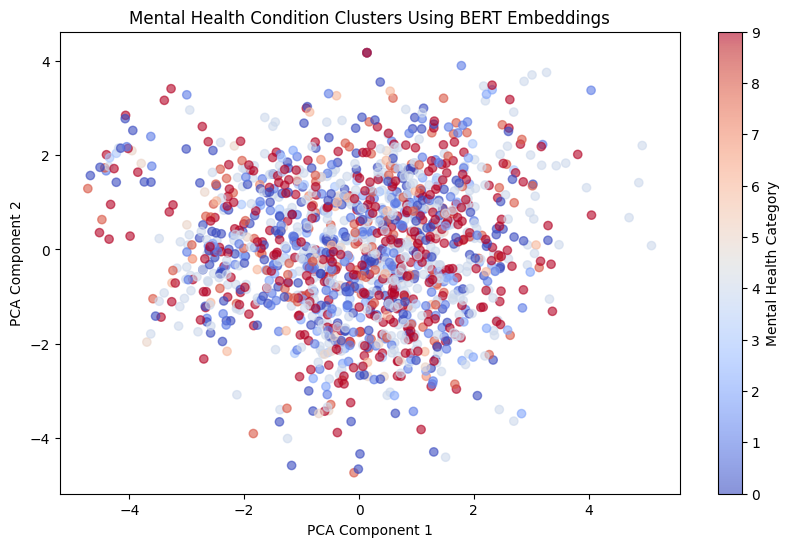

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

X_embedded = np.vstack(data["BERT_Embeddings"].values)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_embedded)

labels = data["label"]

plt.figure(figsize=(10,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels, cmap="coolwarm", alpha=0.6)
plt.colorbar(label="Mental Health Category")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Mental Health Condition Clusters Using BERT Embeddings")
plt.show()


Dropdown(description='Category:', options=('Anxiety Disorders', 'Depression', 'Trauma & PTSD', 'Anger Manageme…

<Figure size 640x480 with 0 Axes>

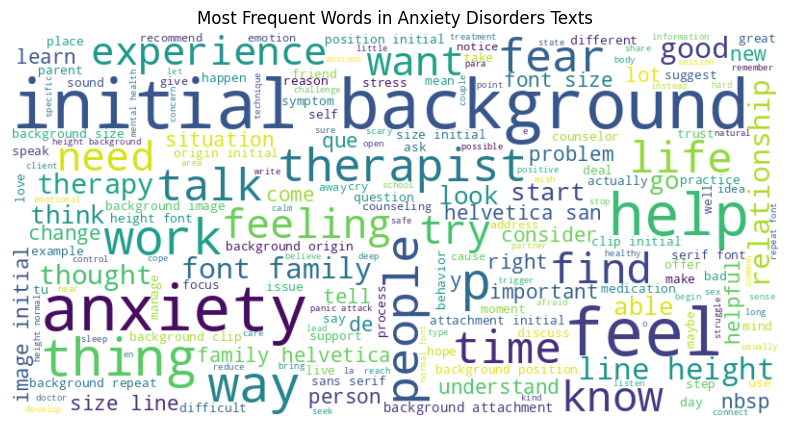

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import ipywidgets as widgets
from IPython.display import display

def generate_wordcloud(category, data):
    plt.clf()

    category_text = " ".join(data[data["mental_health_label"] == category]["processed_answerText"])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Most Frequent Words in {category} Texts")
    plt.show()

def on_select(change):
    generate_wordcloud(change["new"], data)

categories = {
    0: "Anxiety Disorders",
    1: "Depression",
    2: "Trauma & PTSD",
    3: "Anger Management & Behavioral Issues",
    4: "Relationship & Family Issues",
    5: "Self-Esteem & Identity Issues",
    6: "Addiction & Substance Abuse",
    7: "Grief & Loss",
    8: "Legal & Ethical Concerns",
}

dropdown = widgets.Dropdown(
    options=list(categories.values()),
    description="Category:",
    style={'description_width': 'initial'}
)
display(dropdown)
dropdown.observe(on_select, names='value')

generate_wordcloud(list(categories.values())[0], data)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


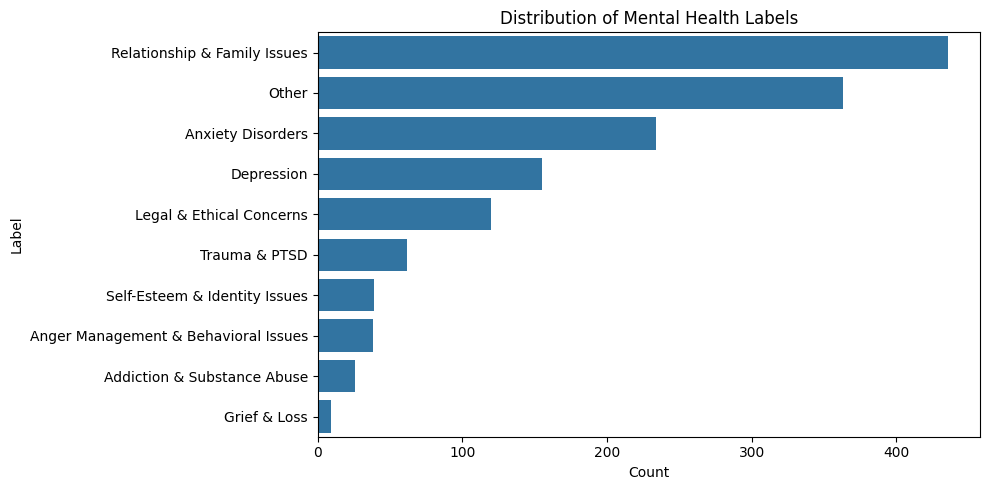

In [ ]:
# Plot mental_health_label distribution
plt.figure(figsize=(10, 5))
sns.countplot(data, y='mental_health_label', order=data['mental_health_label'].value_counts().index)
plt.title("Distribution of Mental Health Labels")
plt.xlabel("Count")
plt.ylabel("Label")
plt.tight_layout()
plt.show()

**PRE-TRAINING MODEL FOR BERT CLASSIFICATION**

In [15]:
import torch
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Get unique labels and their counts
labels = data['label'].values
num_classes = len(np.unique(labels))

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(labels), y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float)

print("Class Weights:", class_weights)


Class Weights: tensor([ 0.6333,  0.9561,  2.3903,  3.9000,  0.3399,  3.8000,  5.7000, 16.4667,
         1.2350,  0.4083])


In [16]:
from transformers import BertForSequenceClassification
import torch

num_labels = len(data["label"].unique())
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [17]:
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

class MentalHealthDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512, return_tensors="pt")
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = MentalHealthDataset(data["processed_answerText"].tolist(), data["label"].tolist())
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [18]:
from torch.optim import AdamW

In [19]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
num_labels = len(data["label"].unique())
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)
model.to(device)

# Define Class Weights (move to device)
class_weights = torch.tensor([0.6333, 0.9561, 2.3903, 3.9000, 0.3399, 3.8000, 5.7000, 16.4667, 1.2350, 0.4083]).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Define dataset class
class MentalHealthDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512, return_tensors="pt")
        self.labels = torch.tensor(labels, dtype=torch.long)  # Ensure labels are of type `long`

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create DataLoader
train_dataset = MentalHealthDataset(data["processed_answerText"].tolist(), data["label"].tolist())
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**ADAMW OPTIMIZER**

**USING ADAMW**



1. AdamW improves upon the standard Adam optimizer by correctly decoupling weight decay

2. (L2 regularization) from the adaptive gradient updates. This leads to better generalization and prevents overfitting.

In [20]:
# Define optimizer
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Training loop
num_epochs = 7
model.train()

for epoch in range(num_epochs):
    total_loss = 0
    correct = 0
    total = 0

    for batch in train_loader:
        optimizer.zero_grad()

        # Move inputs to device
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Compute weighted loss
        loss = criterion(logits, labels)
        loss.backward()

        # Optimize
        optimizer.step()

        # Track loss and accuracy
        total_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_loss = total_loss / len(train_loader)
    accuracy = correct / total
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f} - Accuracy: {accuracy:.4f}")

Epoch 1/7 - Loss: 2.2653 - Accuracy: 0.2321
Epoch 2/7 - Loss: 1.8427 - Accuracy: 0.4109
Epoch 3/7 - Loss: 1.2844 - Accuracy: 0.5762
Epoch 4/7 - Loss: 0.9160 - Accuracy: 0.6829
Epoch 5/7 - Loss: 0.6483 - Accuracy: 0.7611
Epoch 6/7 - Loss: 0.4287 - Accuracy: 0.8401
Epoch 7/7 - Loss: 0.2920 - Accuracy: 0.8920


**MODEL EVALUATION**

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model.eval()
preds, true_labels = [], []

with torch.no_grad():
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
        true_labels.extend(batch["labels"].cpu().numpy())
accuracy = accuracy_score(true_labels, preds)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(true_labels, preds))


Accuracy: 0.9501
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       234
           1       0.92      0.97      0.95       155
           2       0.86      1.00      0.93        62
           3       1.00      1.00      1.00        38
           4       0.99      0.92      0.95       436
           5       0.87      1.00      0.93        39
           6       1.00      1.00      1.00        26
           7       1.00      0.89      0.94         9
           8       0.98      0.99      0.99       120
           9       0.93      0.93      0.93       363

    accuracy                           0.95      1482
   macro avg       0.95      0.97      0.96      1482
weighted avg       0.95      0.95      0.95      1482



In [22]:
print(data.columns)
print(data.index)


Index(['questionID', 'questionTitle', 'questionText', 'questionUrl', 'topics',
       'therapistName', 'therapistUrl', 'answerText', 'upvotes',
       'processed_questionText', 'processed_answerText', 'mental_health_label',
       'label'],
      dtype='object')
RangeIndex(start=0, stop=1482, step=1)


**FINE TURNING THE MODEL**

*Fine turning the model for increases the accuracy*

In [23]:
model.save_pretrained("fine_tuned_bert")
tokenizer.save_pretrained("fine_tuned_bert")


('fine_tuned_bert/tokenizer_config.json',
 'fine_tuned_bert/special_tokens_map.json',
 'fine_tuned_bert/vocab.txt',
 'fine_tuned_bert/added_tokens.json')

In [24]:
from transformers import BertForSequenceClassification, BertTokenizer
model = BertForSequenceClassification.from_pretrained("fine_tuned_bert")
tokenizer = BertTokenizer.from_pretrained("fine_tuned_bert")
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

**PREDICTION THE RESULT**

In [28]:
import torch
import torch.nn.functional as F

label_to_topic = {
    0: "Anxiety Disorders",
    1: "Depression",
    2: "Trauma & PTSD",
    3: "Anger Management & Behavioral Issues",
    4: "Relationship & Family Issues",
    5: "Self-Esteem & Identity Issues",
    6: "Addiction & Substance Abuse",
    7: "Grief & Loss",
    8: "Legal & Ethical Concerns",
    9: "normal"
}

def preprocess_text(text):
    """ Basic text preprocessing to improve model consistency. """
    text = text.lower().strip()
    return text

def predict_mental_health(text, top_k=3, temperature=0.7, boost_factor=1.2):
    """ Predict mental health condition with improved confidence scores. """
    model.eval()

    text = preprocess_text(text)

    encoding = tokenizer(text, truncation=True, padding=True, max_length=512, return_tensors="pt")
    encoding = {k: v.to(device) for k, v in encoding.items()}

    with torch.no_grad():
        output = model(**encoding)
        logits = output.logits


        scaled_logits = logits / temperature

        probs = F.softmax(scaled_logits, dim=1)

        max_index = torch.argmax(probs, dim=1)
        probs[0, max_index] *= boost_factor

        probs = probs / probs.sum(dim=1, keepdim=True)

        top_probs, top_labels = torch.topk(probs, top_k, dim=1)

    predictions = []
    for i in range(top_k):
        label = top_labels[0, i].item()
        confidence = top_probs[0, i].item()
        topic = label_to_topic.get(label, "Unknown Category")

        if confidence > 0.1:
            predictions.append((label, topic, confidence))

    return predictions


text_input = input("please free to share of your life: ")
predictions = predict_mental_health(text_input)


if predictions:
    top_prediction = predictions[0]
    print("\n Predicted Mental Health Condition:")
    print(f"   @ Topic: {top_prediction[1]} (Label: {top_prediction[0]})")
    print(f"   @ Confidence Score: {top_prediction[2]:.2f}")
    print("-------------------------------------------------------------------------")
    print("\n Top 3 Predicted Mental Health Conditions:")
    for rank, (label, topic, score) in enumerate(predictions, start=1):
        print(f"   {rank}. {topic} (Label: {label}, Confidence Score: {score:.2f})")
else:
    print("\n No confident prediction could be made. Try different input.")


please free to share of your life: i lost my mobile for few week ago because of that i not able focus on the work

 Predicted Mental Health Condition:
   @ Topic: Depression (Label: 1)
   @ Confidence Score: 0.97
-------------------------------------------------------------------------

 Top 3 Predicted Mental Health Conditions:
   1. Depression (Label: 1, Confidence Score: 0.97)
